<a href="https://colab.research.google.com/github/praivesi/kaggler/blob/main/crab_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

#전처리 및 머신러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (Pandas 귀찮은 경고들)
import sys
import warnings 

warnings.filterwarnings('ignore')

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


/tmp/ipykernel_32/680425202.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
sample_sub = pd.read_csv('/kaggle/input/playground-series-s3e16/sample_submission.csv')

print(train.head(5))
print(test.head(5))
print(sample_sub.head(5))

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8  
      id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0  74051   I  1.0500    0.7625  0.2750   8.618248        3.657085   
1  74052   I  1.1625    0.8875  0.2750  15.507176        7.030676   
2  74053   F  1.2875    0.9875  0.3250  14.571643        5.556502   
3  74054   F  1.5500    0.9875  0.3875  28.377849       13.380964   
4  74055   I  1.1125    

In [ ]:
print(train.describe())
print(train.shape)

                 id        Length      Diameter        Height        Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000  74051.000000   
mean   37025.000000      1.317460      1.024496      0.348089     23.385217   
std    21376.826729      0.287757      0.237396      0.092034     12.648153   
min        0.000000      0.187500      0.137500      0.000000      0.056699   
25%    18512.500000      1.150000      0.887500      0.300000     13.437663   
50%    37025.000000      1.375000      1.075000      0.362500     23.799405   
75%    55537.500000      1.537500      1.200000      0.412500     32.162508   
max    74050.000000      2.012815      1.612500      2.825000     80.101512   

       Shucked Weight  Viscera Weight  Shell Weight           Age  
count    74051.000000    74051.000000  74051.000000  74051.000000  
mean        10.104270        5.058386      6.723870      9.967806  
std          5.618025        2.792729      3.584372      3.175189  
min          0.0

In [ ]:
print(test.describe())
print(test.shape)

                  id        Length      Diameter        Height        Weight  \
count   49368.000000  49368.000000  49368.000000  49368.000000  49368.000000   
mean    98734.500000      1.319795      1.026357      0.348693     23.464627   
std     14251.458382      0.286950      0.236593      0.092259     12.641703   
min     74051.000000      0.187500      0.137500      0.000000      0.056699   
25%     86392.750000      1.162500      0.887500      0.300000     13.536886   
50%     98734.500000      1.387500      1.075000      0.362500     23.813580   
75%    111076.250000      1.537500      1.200000      0.412500     32.290081   
max    123418.000000      2.037500      1.625000      2.825000     80.101512   

       Shucked Weight  Viscera Weight  Shell Weight  
count    49368.000000    49368.000000  49368.000000  
mean        10.130220        5.072615      6.745876  
std          5.611779        2.791563      3.575650  
min          0.028349        0.014175      0.042524  
25%      

In [ ]:
data = pd.concat((train, test))

data.shape

(123419, 10)

In [ ]:
data.info

<bound method DataFrame.info of            id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0           0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1           1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2           2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3           3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4           4   I  1.2500    1.0125  0.3375  23.289114       11.977664   
...       ...  ..     ...       ...     ...        ...             ...   
49363  123414   F  1.3000    1.0375  0.3250  16.315137        6.690482   
49364  123415   I  1.0375    0.7625  0.2625  10.276694        4.436697   
49365  123416   F  1.4875    1.1625  0.3625  31.382897       11.396499   
49366  123417   F  1.2375    0.9500  0.2875  15.663099        6.095142   
49367  123418   M  1.6625    1.3000  0.4375  36.613379       14.911837   

       Viscera Weight  Shell Weight   Age  
0            6.647958      8.348928

In [ ]:
data.describe

<bound method NDFrame.describe of            id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0           0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1           1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2           2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3           3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4           4   I  1.2500    1.0125  0.3375  23.289114       11.977664   
...       ...  ..     ...       ...     ...        ...             ...   
49363  123414   F  1.3000    1.0375  0.3250  16.315137        6.690482   
49364  123415   I  1.0375    0.7625  0.2625  10.276694        4.436697   
49365  123416   F  1.4875    1.1625  0.3625  31.382897       11.396499   
49366  123417   F  1.2375    0.9500  0.2875  15.663099        6.095142   
49367  123418   M  1.6625    1.3000  0.4375  36.613379       14.911837   

       Viscera Weight  Shell Weight   Age  
0            6.647958      8.3489

In [ ]:
data.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,123419.000000,123419.000000,123419.000000,123419.000000,123419.000000,123419.000000,123419.000000,123419.000000,74051.000000
mean,61709.000000,1.318394,1.025241,0.348331,23.416981,10.114650,5.064078,6.732672,9.967806
std,35628.140774,0.287436,0.237076,0.092124,12.645582,5.615519,2.792260,3.580888,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,30854.500000,1.150000,0.887500,0.300000,13.508537,5.740774,2.877474,3.968930,8.000000
50%,61709.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.945627,10.000000
75%,92563.500000,1.537500,1.200000,0.412500,32.205032,14.047177,7.002326,9.100190,11.000000
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


<Axes: >

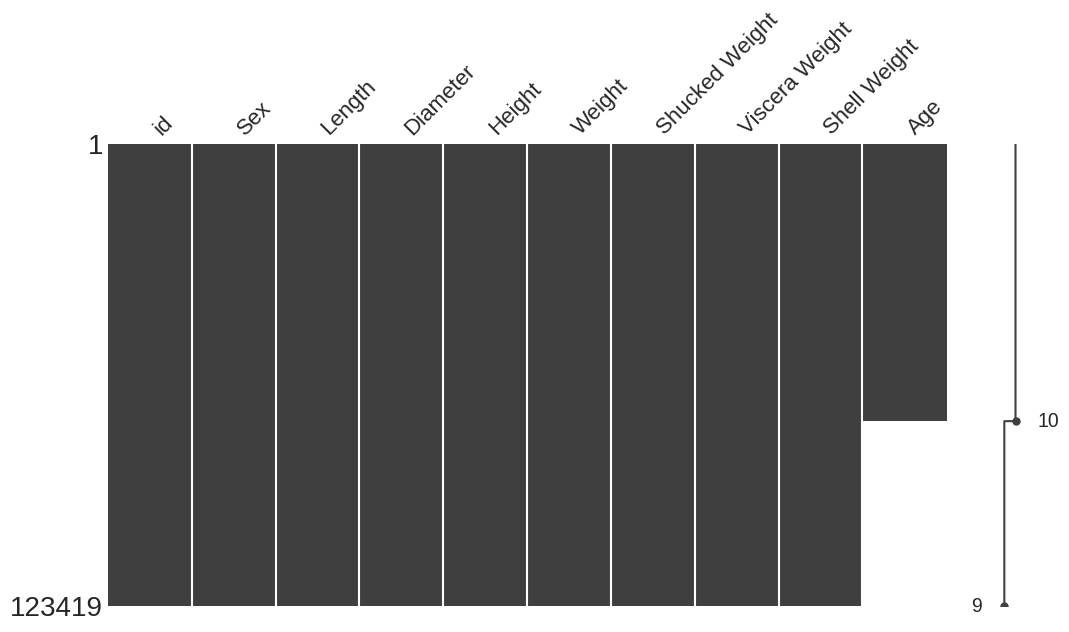

In [ ]:
missingno.matrix(data, figsize=(12,6))

In [ ]:
data.head(30)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
5,5,M,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10.0
6,6,M,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,11.0
7,7,I,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,11.0
8,8,F,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,12.0
9,9,M,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,11.0


In [ ]:
data.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

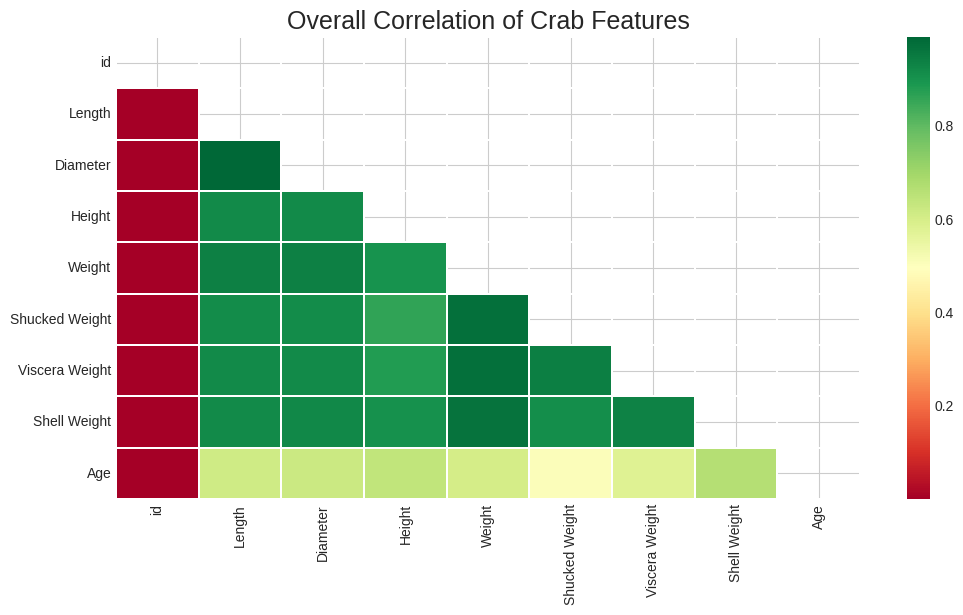

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,6))
plt.title('Overall Correlation of Crab Features', fontsize=18)

sns.heatmap(corr, mask = mask, annot = False, cmap = 'RdYlGn', linewidth=0.2, annot_kws={'size': 20})
plt.show()

9     12473
10    11480
8      9966
11     8746
7      6574
12     4747
6      4532
13     3720
14     2305
5      1913
15     1836
16     1281
17     1012
4       948
18      693
19      588
20      415
21      241
3       213
23      120
22       98
27       33
24       29
25       21
26       19
29       18
1        16
2        14
Name: Age, dtype: int64


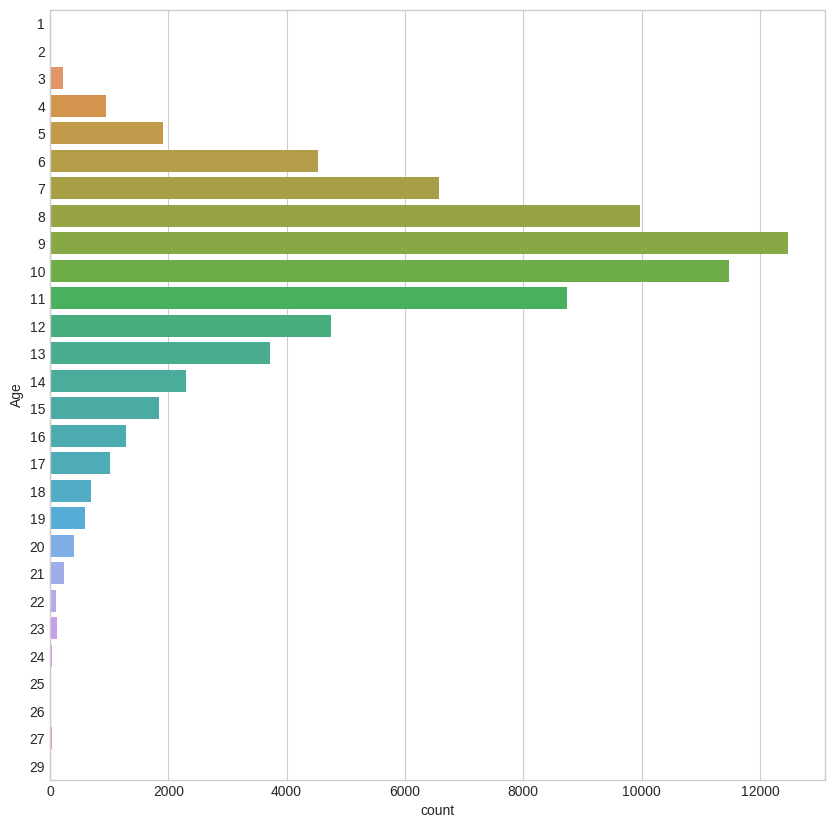

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y='Age', data=train)
print(train.Age.value_counts())

In [ ]:
def piecount(col):
  f, ax = plt.subplots(1, 2, figsize=(15,10))
  train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
  ax[0].set_title(col)
  ax[0].set_ylabel('')
  sns.countplot(x=col, data=train, ax=ax[1])
  ax[1].set_title(col)
  plt.show()

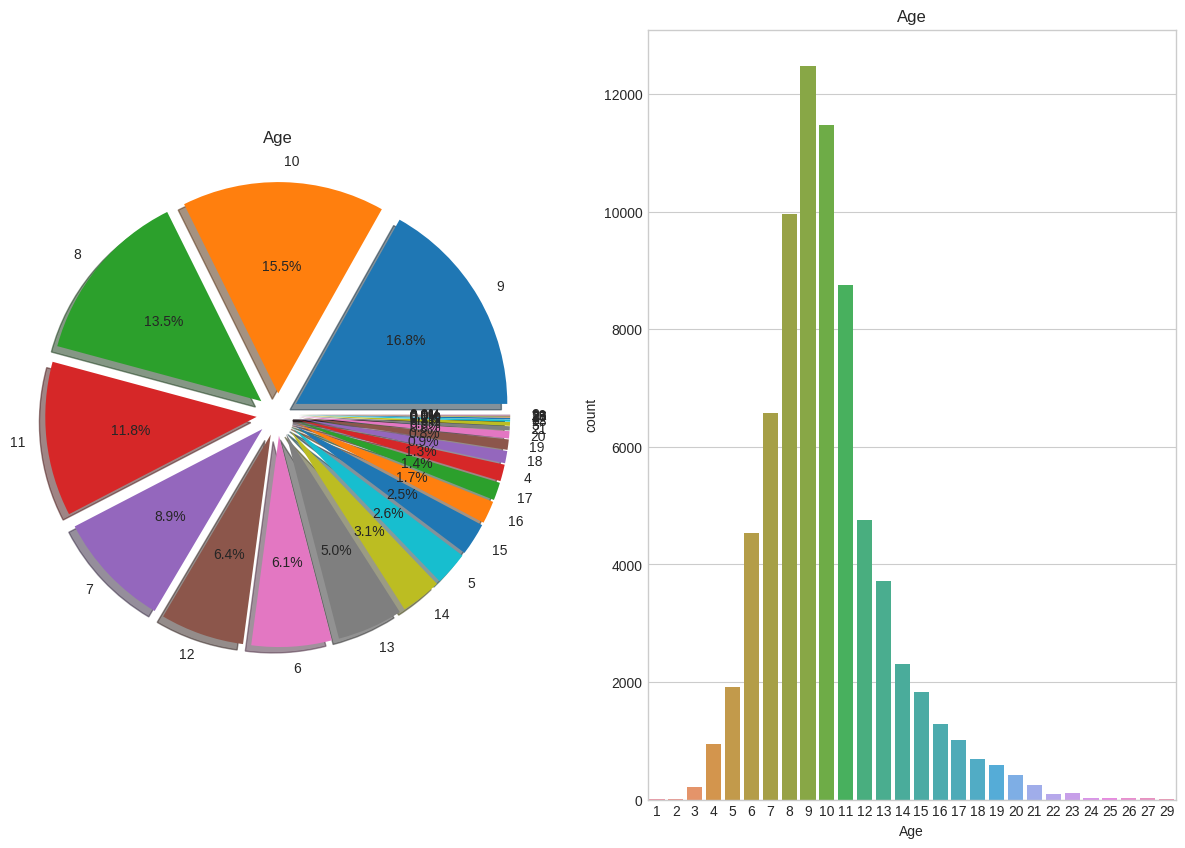

In [ ]:
piecount('Age')

In [ ]:
# 이건 별 의미 없는듯..
#train.groupby(['Weight', 'Age'])['Age'].count()